In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [2]:
equation = r"W(t) = W(0) + \sum_{i=1}^{n} Z_i \cdot (t_i - t_{i-1})^{\frac{1}{2}}"
display(Math(equation))

<IPython.core.display.Math object>

In [3]:
def brownian_motion(X_0, T, N, n, with_mean=True):
    """This function simulate standard brownian motion.

    @Params:
    --------
    X_0: int drift from whare brownian motion start.
    T: int to generate times interval.
    N: int number of instance. 
    n: int number of trajectory simulated.
    with_mean: bool either to calculate mean process or not.


    --------
    return t_axes: nd.array, Bt: nd.array, Bt_mean: nd.array
    """
    Bt = np.full((N, n), X_0,dtype=float)  # Initialize brownian matrix with size (N, n) value X_0
    normal_dist = np.random.standard_normal((N, n))

    dt = T / N
    t_axes = np.linspace(0, T, N)
    for i in range(1, N):
        Bt[i] = Bt[i - 1] + np.sqrt(dt) * normal_dist[i - 1]

    if with_mean:
        Bt_mean = np.mean(Bt, 1).reshape(N, 1)
        return t_axes, Bt, Bt_mean
    else: 
        return t_axes, Bt
    



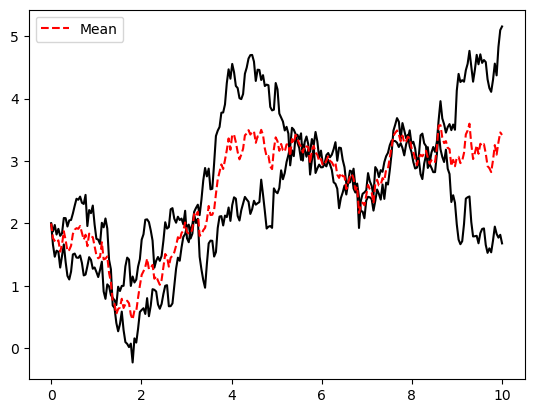

In [4]:
t_axes, Bt,Bt_mean = brownian_motion(2, 10, 250, 2)
plt.plot(t_axes,Bt,color='black')
plt.plot(t_axes,Bt_mean, color='r', linestyle='--', label='Mean')
plt.legend()
plt.show()

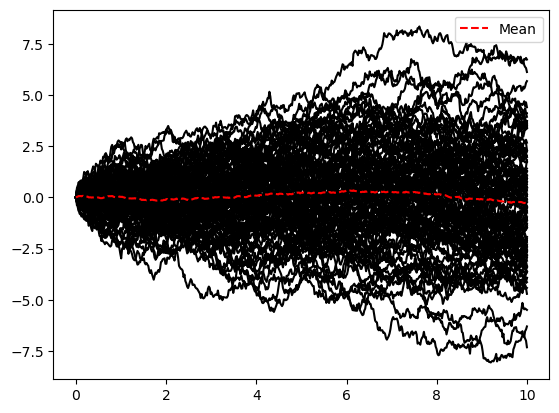

In [6]:
t_axes, Bt,Bt_mean = brownian_motion(0, 10, 500, 100)
plt.plot(t_axes,Bt,color='black')
plt.plot(t_axes,Bt_mean, color='r', linestyle='--', label='Mean')
plt.legend()
plt.show()

## 2. mouvement brownien positif et avec valeur absolue

In [76]:
def positif_brownian(X_0, T, N, n):
    """Simulate positif brownian motion"""
    t_axes, Bt= brownian_motion(X_0, T, N, n,with_mean=False)
    Bt[Bt < 0] = 0

    return t_axes, Bt

In [77]:
t_axes, Bt = positif_brownian(1, 10, 1000, 3)

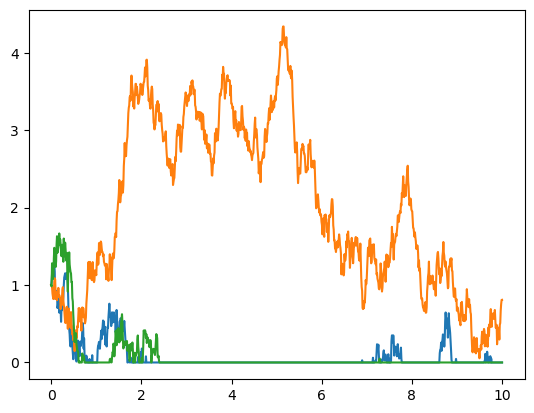

In [78]:
plt.plot(t_axes,Bt)

In [80]:
def abs_brownian(X_0, T, N, n):
    """Simulate positif brownian motion"""
    t_axes, Bt= brownian_motion(X_0, T, N, n,with_mean=False)
    Bt = np.abs(Bt)

    return t_axes, Bt

In [81]:
t_axes, Bt = abs_brownian(1, 10, 1000, 3)

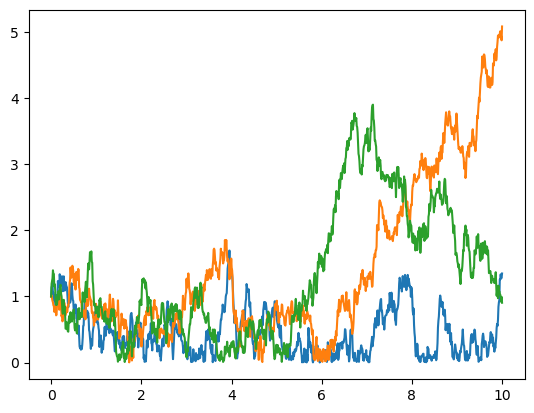

In [82]:
plt.plot(t_axes,Bt)

## 3. mouvement brownian geometrique

$$ X(i) = X(i-1) \times \left(1 + \mu \times dt + \sigma \times dW\right) $$

In [83]:
"""
- initialize X0
- define mu,sigma,T,n,N
- normal distribution with sigma dt= T/ N
- iterate and generate the process
"""

'\n- initialize X0\n- define mu,sigma,T,n,N\n- normal distribution with sigma dt= T/ N\n- iterate and generate the process\n'

In [68]:
def brownian_geo(X_0, T, n, N, mu, sigma):
    
    #t_axes, Bt = brownian_motion(0, T, N, n,with_mean=False)
    #dBt = np.diff(Bt,axis=0)
    Xt = np.full((N, n), X_0,dtype=float)
    dt = T/N
    t_axes = np.linspace(0, T, N) 
    dWt = np.random.normal(loc=0.0, scale=np.sqrt(dt),size=(N,n))
    
    for i in range(1, N):
        Xt[i] = Xt[i-1] * (1 + (mu * dt) + sigma * dWt[i-1])
                           
    return t_axes, Xt
t_axes, Xt = brownian_geo(1, 5, 3, 1000, 0.1, 0.5)


Text(0.5, 1.0, 'Simulation du mouvement brownien geometrique')

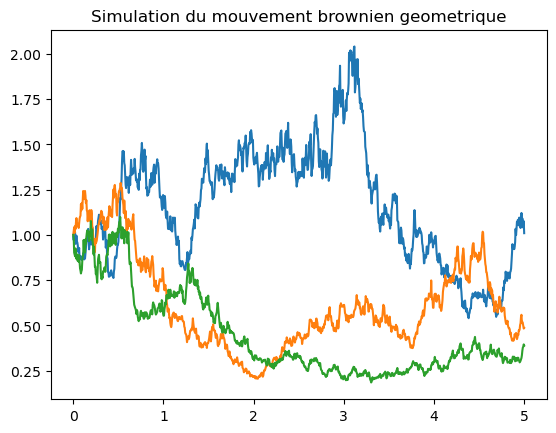

In [69]:
plt.plot(t_axes,Xt)
plt.title('Simulation du mouvement brownien geometrique')